MobileNet - final test, with 100 epoch (2 different optimizers)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from mobilenet_utils import plot_training_history

# Params
img_size = 224
batch_size = 32
num_classes = 10

# Paths
train_dir = r"C:\Users\jakub\Desktop\muzyka_guiio\Music-Classification\project_data\train_spectrograms"
test_dir = r"C:\Users\jakub\Desktop\muzyka_guiio\Music-Classification\project_data\test_spectrograms"

# Train/val generators (80/20 split)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


print("Train:")
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

print("Val:")
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Test generator (no split)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Test:")
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Train:
Found 640 images belonging to 10 classes.
Val:
Found 159 images belonging to 10 classes.
Test:
Found 200 images belonging to 10 classes.



===== Trening z optymalizatorem: Adam =====


c:\Users\jakub\Desktop\muzyka_guiio\Music-Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1381 - loss: 2.4178 - precision: 0.0095 - val_accuracy: 0.3333 - val_loss: 1.8654 - val_precision: 1.0000
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 855ms/step - accuracy: 0.4784 - loss: 1.6202 - precision: 0.8371 - val_accuracy: 0.4465 - val_loss: 1.6229 - val_precision: 0.8621
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 899ms/step - accuracy: 0.5941 - loss: 1.3334 - precision: 0.8953 - val_accuracy: 0.4340 - val_loss: 1.5437 - val_precision: 0.7551
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 909ms/step - accuracy: 0.6327 - loss: 1.1759 - precision: 0.9085 - val_accuracy: 0.4780 - val_loss: 1.4554 - val_precision: 0.7667
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 890ms/step - accuracy: 0.7047 - loss: 1.0294 - precision: 0.8915 - val_accuracy: 0.4843 - val_loss: 1.4444 - val_precision: 0.7083
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 902ms/step - accuracy: 0.7198 - loss: 0.9829 - precision: 0.8900 - val_accuracy: 0.5157 - 

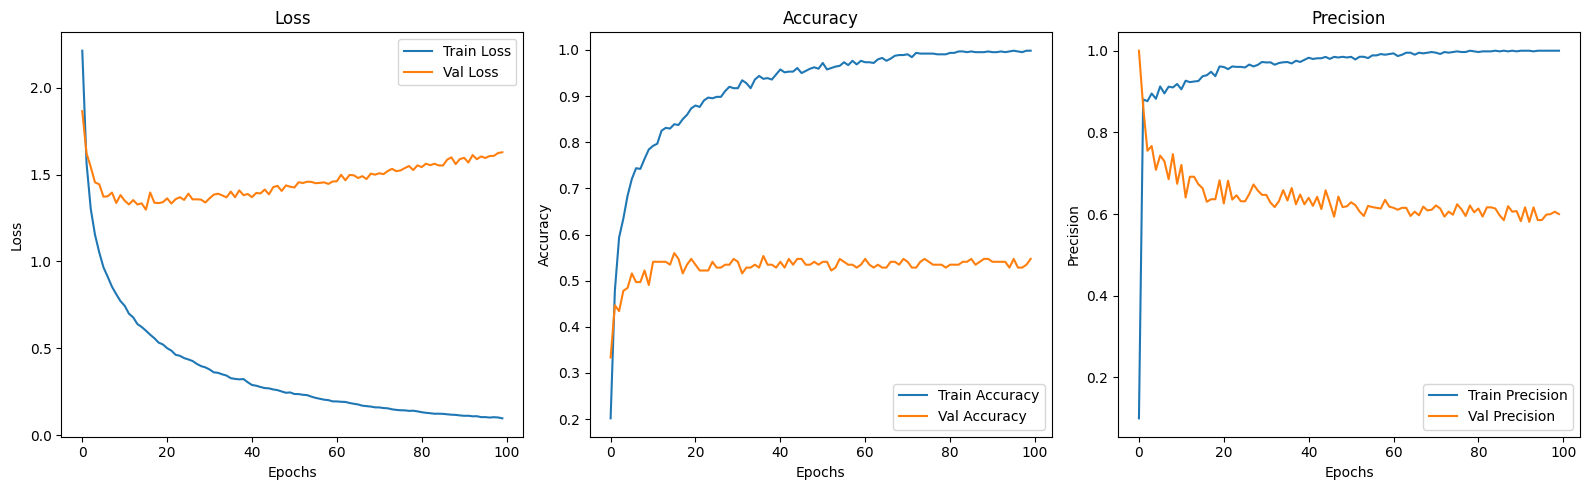

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step  


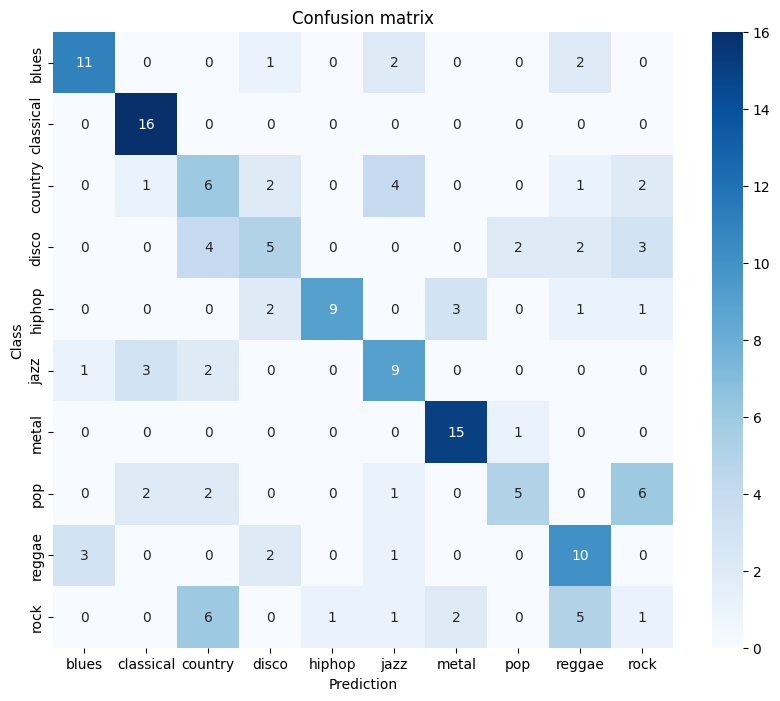


===== Trening z optymalizatorem: RMSprop =====
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2311 - loss: 2.2154 - precision_1: 0.3637 - val_accuracy: 0.4025 - val_loss: 1.7722 - val_precision_1: 0.9545
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 954ms/step - accuracy: 0.5081 - loss: 1.5238 - precision_1: 0.9620 - val_accuracy: 0.3711 - val_loss: 1.6256 - val_precision_1: 0.8857
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 920ms/step - accuracy: 0.5780 - loss: 1.3165 - precision_1: 0.9093 - val_accuracy: 0.4969 - val_loss: 1.4494 - val_precision_1: 0.8667
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 931ms/step - accuracy: 0.6659 - loss: 1.1301 - precision_1: 0.8823 - val_accuracy: 0.4654 - val_loss: 1.4426 - val_precision_1: 0.7241
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 928ms/step - accuracy: 0.6781 - loss: 1.0408 - precision_1: 0.8550 - val_accuracy: 0.5094 - val_loss: 1.3929 - val_precision_1: 0.7692
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 936ms/step - accuracy:

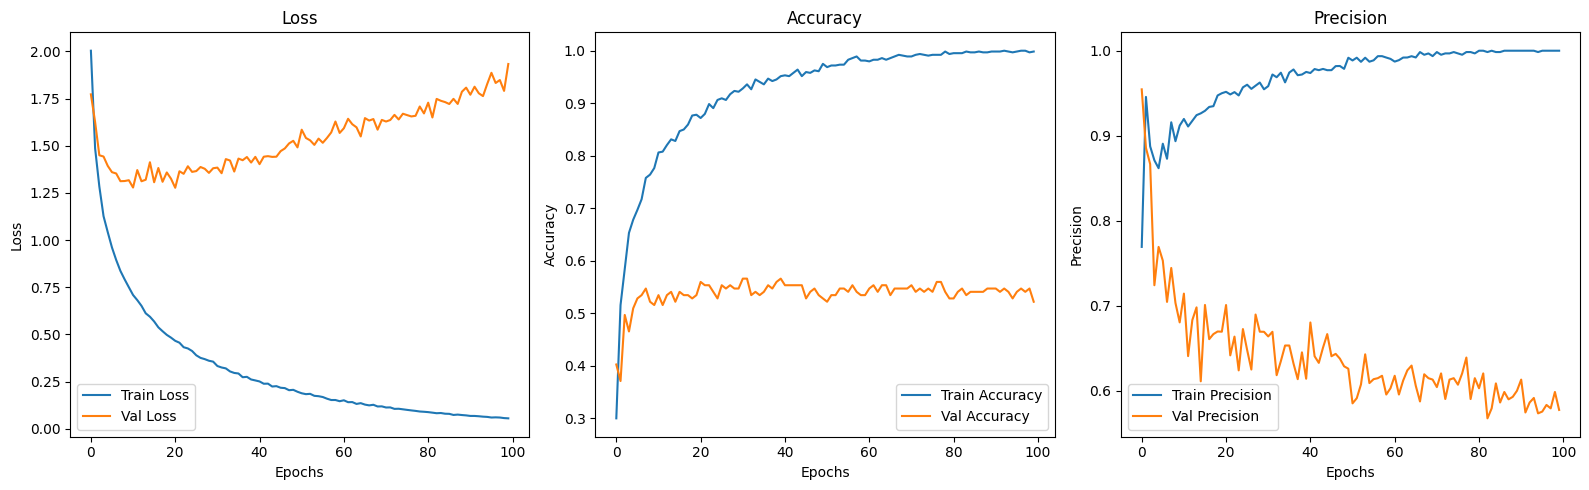

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step  


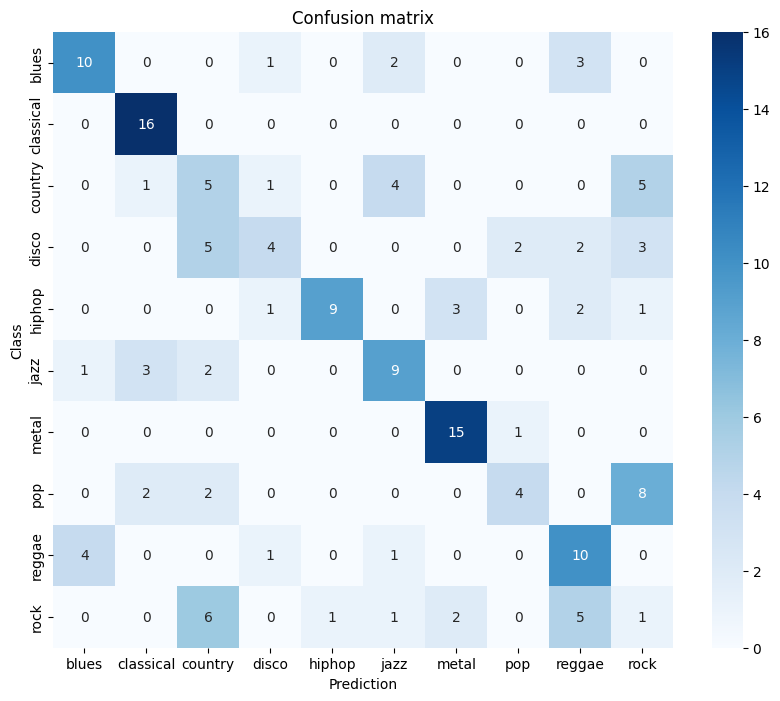

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from mobilenet_utils import plot_training_history
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import numpy as np


optimizers = {
    "Adam": Adam(),
    "RMSprop": RMSprop()
}

results_summary = {}

for name, optimizer in optimizers.items():
    print(f"\n===== Trening z optymalizatorem: {name} =====")

    # Buduj model od nowa w każdej iteracji
    base_model = MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision()])

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=100
    )

    # Ewaluacja
    print("\nTesting ----------------------------")
    results = model.evaluate(test_generator, verbose=0)

    test_loss, test_acc, test_precision = results[0], results[1], results[2]
    print(f"{name} - Test Loss: {test_loss:.4f} | Accuracy: {test_acc:.2%} | Precision: {test_precision:.2%}")

    # Zapisz wyniki
    results_summary[name] = {
        "loss": test_loss,
        "accuracy": test_acc,
        "precision": test_precision,
        "history": history
    }

    # Wyświetl wykresy
    plot_training_history(history)
    # Generujemy predykcje
    y_pred = model.predict(val_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Prawdziwe etykiety
    y_true = val_generator.classes

    # Nazwy klas
    class_labels = list(val_generator.class_indices.keys())

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Prediction")
    plt.ylabel("Class")
    plt.title("Confusion matrix")
    plt.show()